In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
import math
import matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
ZYAM: 6 to 8
6
['../InputData/pT_Rebin_1_16dPhi/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1_16dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root']
[12.0, 40.0]
ZYAM: 6 to 8
6
['../InputData/pT_Rebin_1_16dPhi/pp_SE_L0_Correlation_GMB_Ratio.root', '../InputData/pT_Rebin_1_16dPhi/pPb_SE_L0_Correlation_GMB_Ratio.root']
[12.0, 40.0]


In [2]:
print(N_dPhi_Bins)
print(dPhi_Bins)
print("")
print(len(delta_phi_centers))
print(delta_phi_centers)
print("UE points")
print(ue_error_bar)

16
[0.0, 0.19634954084936207, 0.39269908169872414, 0.5890486225480862, 0.7853981633974483, 0.9817477042468103, 1.1780972450961724, 1.3744467859455345, 1.5707963267948966, 1.7671458676442586, 1.9634954084936207, 2.1598449493429825, 2.356194490192345, 2.552544031041707, 2.748893571891069, 2.945243112740431, 3.141592653589793]

16
[0.09817477042468103, 0.2945243112740431, 0.4908738521234052, 0.6872233929727672, 0.8835729338221293, 1.0799224746714913, 1.2762720155208536, 1.4726215563702154, 1.6689710972195777, 1.8653206380689396, 2.061670178918302, 2.2580197197676637, 2.454369260617026, 2.6507188014663883, 2.84706834231575, 3.043417883165112]
UE points
[0.39269908169872414, 0.7853981633974483]


In [3]:
Corrs = ROOT_to_nparray()

In [4]:
reload(functions_correlations)
from functions_correlations import *

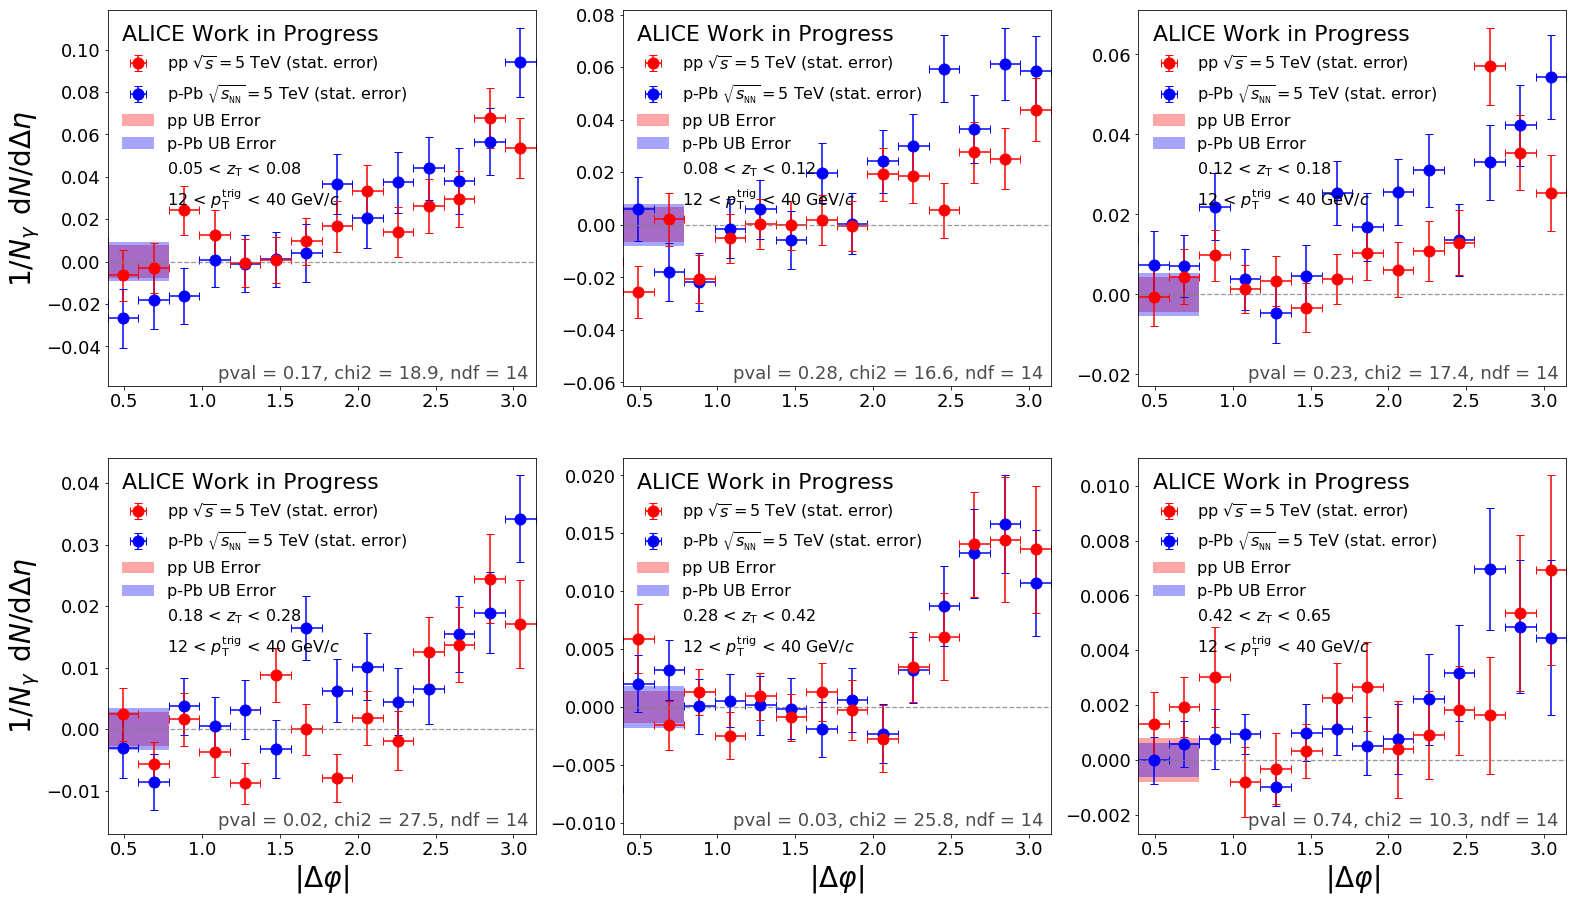

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h1 with less than 10 effective events.

Info in <TH1F::Chi2TestX>: There is a bin in h2 with less than 10

In [5]:
Show_Plots = True

Correlated_Subtraction_Weights(Corrs)
#if (Show_Plots):
#    Plot_UB_Subtraction(Corrs)
Ped_Sub_After_Cs(Corrs)
if (Show_Plots):
    Plot_pp_pPb_Cs(Corrs)

$C_S = \frac{C_{SR} - (1-p) C_{BR}}{p}$

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

In [6]:
Frags = Get_Fragmentation(Corrs)

for ipt in range(N_pT_Bins):
    print("[p-Pb] pT %1.0f-%1.0f:  "%(pTbins[ipt],pTbins[ipt+1]))
    for izt in range(NzT):
        print(r"%1.2f +- %1.2f"%(Frags["p-Pb_FF"][ipt][izt],Frags["p-Pb_FF_Errors"][ipt][izt]))
    print("")
print("")

for ipt in range(N_pT_Bins):
    print("[pp] pT %1.0f-%1.0f:  "%(pTbins[ipt],pTbins[ipt+1]))
    for izt in range(NzT):
        print(r"%1.2f +- %1.2f"%(Frags["pp_FF"][ipt][izt],Frags["pp_FF_Errors"][ipt][izt]))
    print("")
print("")



[p-Pb] pT 12-40:  
10.88 +- 1.44
6.59 +- 0.80
3.18 +- 0.38
0.93 +- 0.16
0.33 +- 0.06
0.10 +- 0.02
0.01 +- 0.01


[pp] pT 12-40:  
8.40 +- 1.24
3.41 +- 0.68
2.35 +- 0.34
0.70 +- 0.16
0.33 +- 0.07
0.07 +- 0.03
0.01 +- 0.01




**Weigthed Average:** $\frac{\sum_{i=1}^{n}w_i x_i}{\sum_{i=1}^{n}w_i}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [7]:
Combined_Frags = Average_FF(Frags)

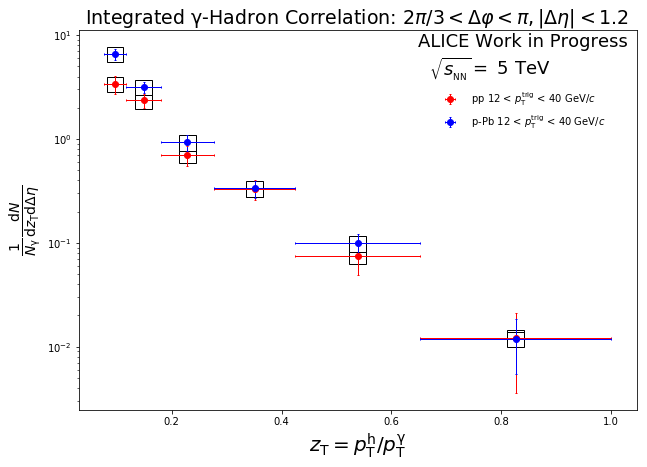

                    pp Central Values:
[3.40889969 2.35192612 0.70338196 0.33045848 0.07487091 0.01220589]

                    pp Stat. Uncertainty:
[0.68165169 0.34330874 0.15524736 0.07220577 0.02561812 0.00862289]

                    p-Pb Central Values:
[6.59335344 3.18227327 0.93145902 0.33365585 0.09875375 0.0119124 ]

                    p-Pb Stat. Uncertainty:
[0.79904655 0.37981348 0.15906627 0.06211615 0.02283951 0.00652546]

                        LaTeX Table
Source   &  pp data & \pPb~data  \\
Statistical Uncertainty & 15\%-71\% & 12\%-55\% \\
\hline
Purity & 16\%-16\% & 16\%-16\% \\
Tracking Efficiency &  5\% & 5\%  \\ 


In [8]:
Plot_pp_pPb_Avg_FF(Combined_Frags)

In [9]:
reload(functions_fragmentation)
from functions_fragmentation import *

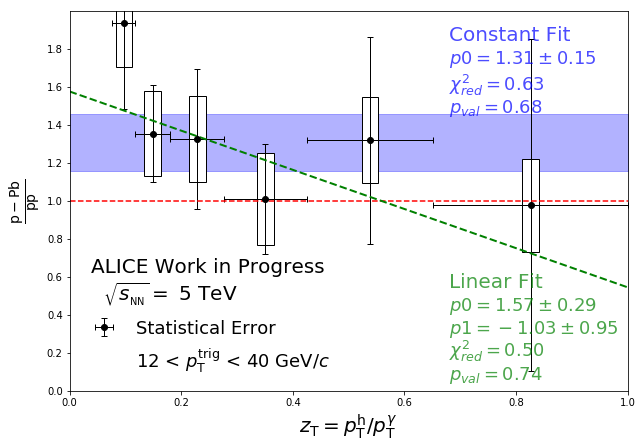

                Central Values:
[1.93415883 1.35304985 1.32425776 1.00967556 1.31898697 0.97595493]

                Ratio Uncertainty from Purity:
[0.183921   0.20315445 0.2047257  0.22994501 0.20502317 0.23391295]

                Ratio Uncertainty from Single Track Efficiency:
[0.13676568 0.09567507 0.09363916 0.07139484 0.09326646 0.06901043]

                Full Systematic Uncertainty:
[0.22919814 0.22455612 0.2251242  0.24077361 0.22524017 0.24388052]

****************************************
Minimizer is Linear
Chi2                      =      3.15467
NDf                       =            5
p0                        =      1.30624   +/-   0.150476    

****************************************
Minimizer is Linear
Chi2                      =      1.98305
NDf                       =            4
p0                        =      1.57467   +/-   0.290073    
p1                        =     -1.02926   +/-   0.950891    


In [10]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

## Compare Trigger pT Bins

In [10]:
reload(functions_correlations)
from functions_correlations import *

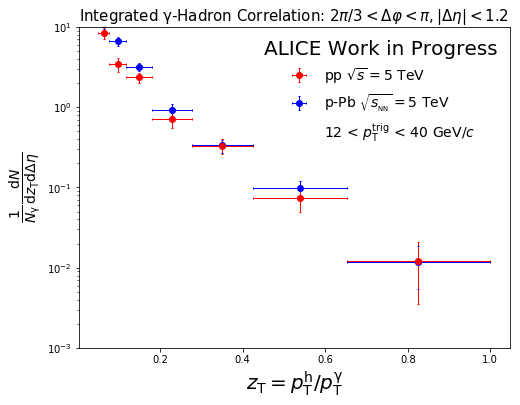

In [11]:
Plot_FF(Frags)

In [12]:
reload(functions_fragmentation)
from functions_fragmentation import *

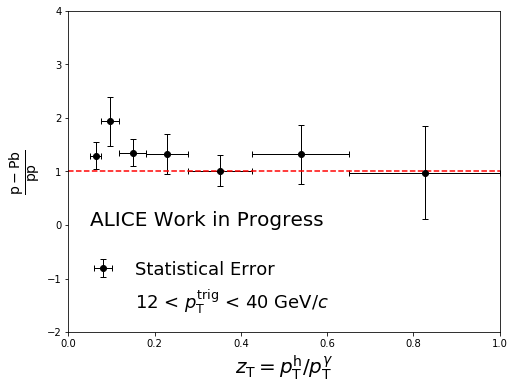

In [13]:
FF_Ratio(Frags)

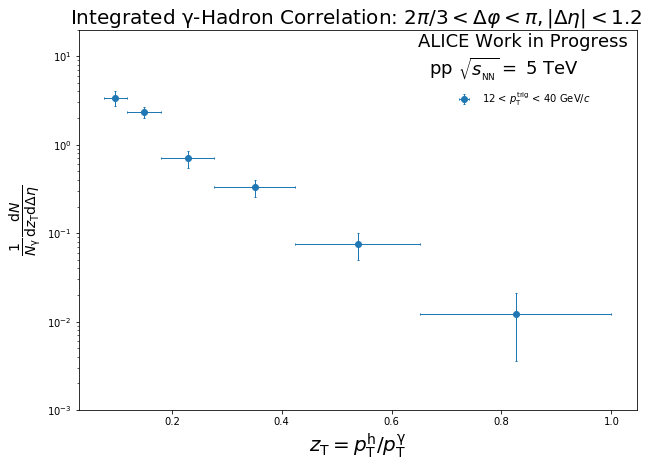

                             PROTON-PROTON:
Central Values
[[8.39714579 3.40889969 2.35192612 0.70338196 0.33045848 0.07487091
  0.01220589]]
Statistical Errors (Relative)
[[0.14754733 0.19996238 0.14596918 0.22071558 0.2185018  0.34216393
  0.70645352]]
Relative Uncertainty from Purity
[[1.3718971  0.55693443 0.38424968 0.11491615 0.05398918 0.01223215
  0.00199416]]




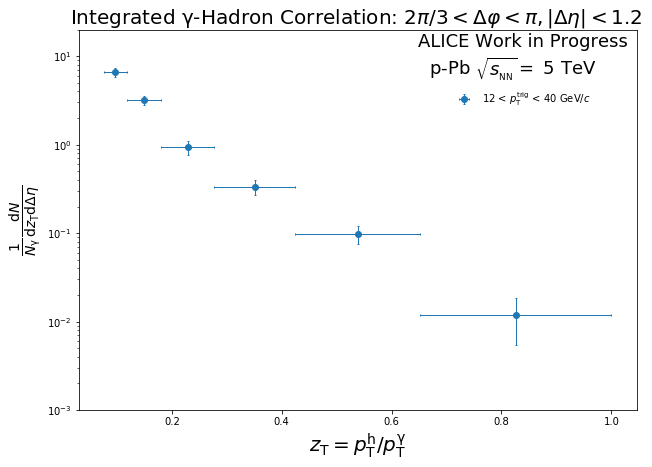

                              PROTON-LEAD:
Central Values
[[10.8758358   6.59335344  3.18227327  0.93145902  0.33365585  0.09875375
   0.0119124 ]]
Statistical Errors (Relative)
[[0.13262384 0.1211897  0.11935288 0.17077109 0.18616833 0.2312774
  0.54778721]]
Relative Uncertainty from Purity
[[1.77685704 1.07719964 0.51990898 0.1521786  0.05451156 0.01613405
  0.00194621]]




In [14]:
Overlay_pT_FF(Frags)

## Compare Track Cuts

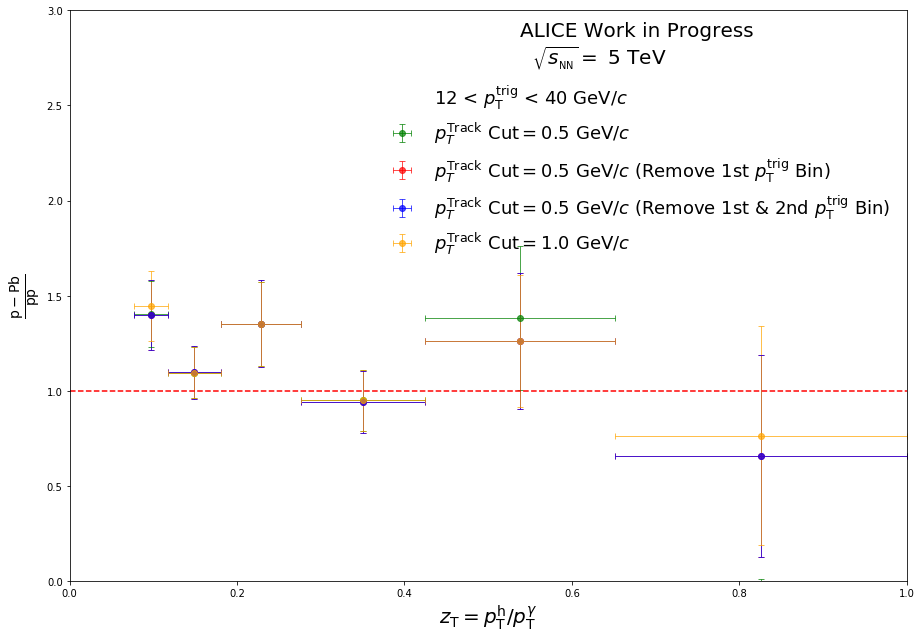

                Central Values:
[1.4481745  1.09574319 1.3500227  0.94988511 1.26222862 0.76439433]

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =       5.4518
NDf                       =            5
p0                        =      1.14786   +/-   0.0813056   

****************************************
Minimizer is Linear
Chi2                      =       5.4518
NDf                       =            5
p0                        =      1.14786   +/-   0.0813056   

****************************************
Minimizer is Linear
Chi2                      =      5.72012
NDf                       =            5
p0                        =      1.16145   +/-   0.0796707   


In [15]:
strings = ["05zT","05zT_3bins","05zT_2bins","1zT"]
string_descriptions = ["$p_{T}^\mathrm{Track}\ \mathrm{Cut} = 0.5\ \mathrm{GeV}/c$",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 0.5\ \mathrm{GeV}/c$ (Remove 1st & 2nd $p_\mathrm{T}^\mathrm{trig}$ Bin)",
                       "$p_{T}^\mathrm{Track}\ \mathrm{Cut}= 1.0\ \mathrm{GeV}/c$"]
colors = ["green","red","blue","orange"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

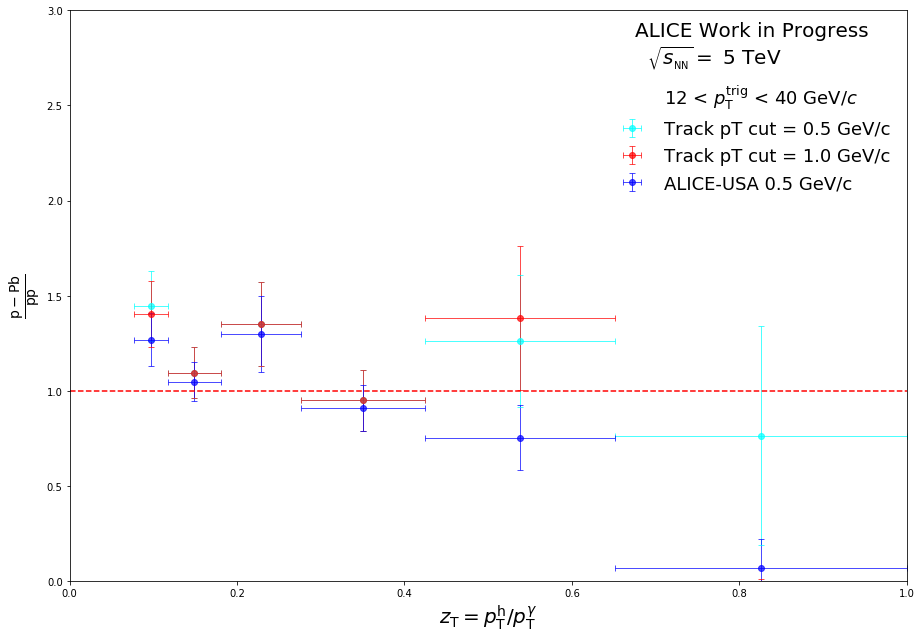

                Central Values:
[1.26981434 1.04878313 1.29933689 0.91089677 0.75447711 0.07122347]

****************************************
Minimizer is Linear
Chi2                      =      5.72012
NDf                       =            5
p0                        =      1.16145   +/-   0.0796707   

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =      43.7378
NDf                       =            5
p0                        =     0.909221   +/-   0.0561982   


In [16]:
strings = ["1zT","05zT","05zT_working_old"]
string_descriptions = ["Track pT cut = 0.5 GeV/c", "Track pT cut = 1.0 GeV/c","ALICE-USA 0.5 GeV/c"]
colors = ["cyan","red","blue"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,False)

## Compare Trigger Photon pT Binning (3,4,& 5 Bins)

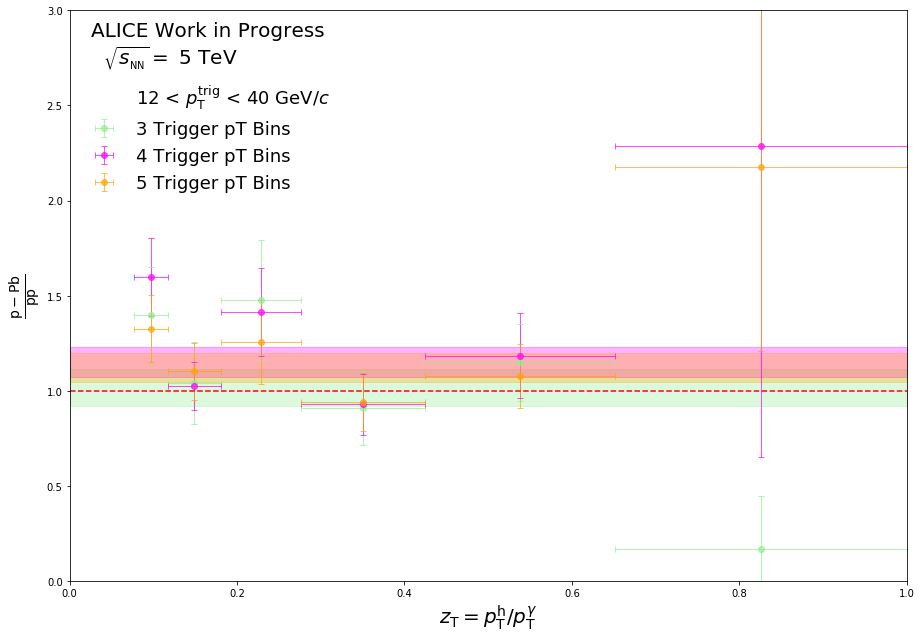

                Central Values:
[1.32684886 1.10166038 1.25803898 0.94240937 1.07806614 2.1777261 ]

****************************************
Minimizer is Linear
Chi2                      =      14.5031
NDf                       =            5
p0                        =       1.0177   +/-   0.0950551   

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      4.39025
NDf                       =            5
p0                        =      1.12323   +/-   0.0753807   


In [17]:
strings = ["pT_Rebin_3","pT_Rebin_4","pT_Rebin_5"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

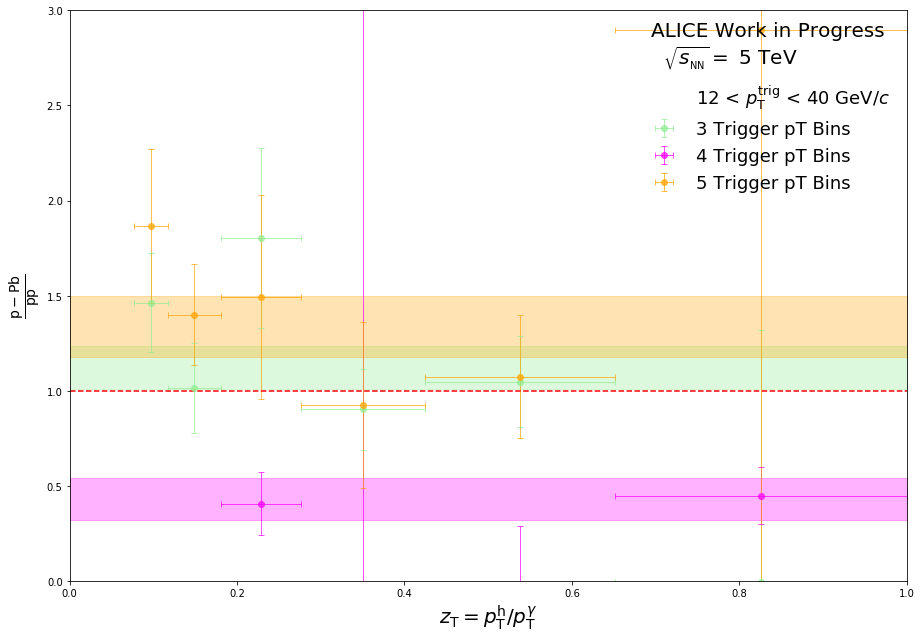

                Central Values:
[1.86557271 1.40054509 1.49282524 0.92696167 1.07433435 2.89808321]

****************************************
Minimizer is Linear
Chi2                      =      5.20283
NDf                       =            4
p0                        =      1.12393   +/-   0.114259    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    

****************************************
Minimizer is Linear
Chi2                      =      3.51774
NDf                       =            5
p0                        =       1.3394   +/-   0.160769    


In [18]:
strings = ["pT_Rebin_3_Cut","pT_Rebin_4_Cut","pT_Rebin_5_Cut"]
string_descriptions = ["3 Trigger pT Bins", "4 Trigger pT Bins","5 Trigger pT Bins"]
colors = ["lightgreen","magenta","orange"]

Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

## Compare ZT Binning (6,7, & 8)

In [19]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


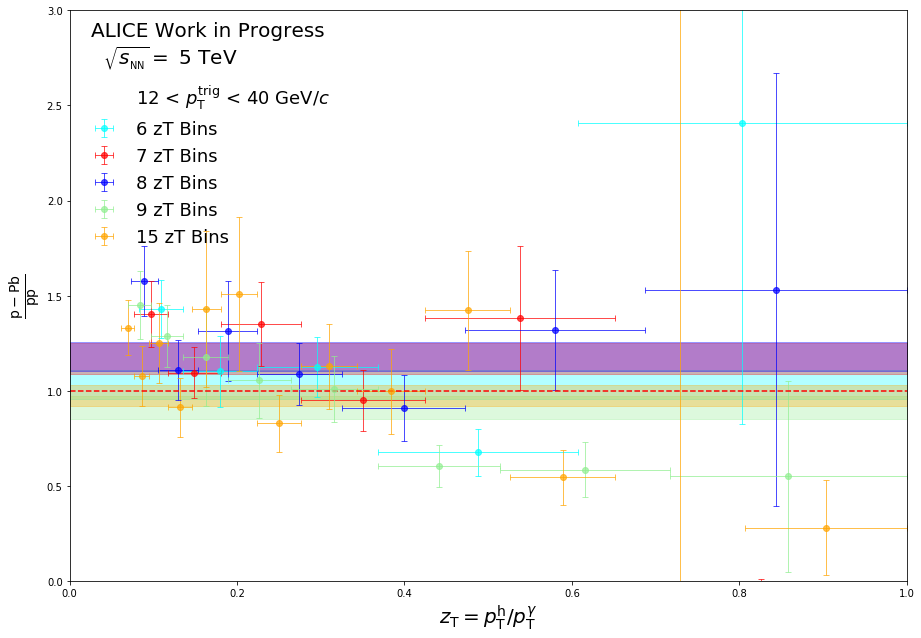

                Central Values:
[1.33279792 1.07594827 1.25077422 0.91343145 1.42914142 1.50908939
 0.82971572 1.12926386 0.9983693  1.42230144 0.54562724 8.00428232
 0.28118115]

****************************************
Minimizer is Linear
Chi2                      =      16.2139
NDf                       =            4
p0                        =      1.03298   +/-   0.0749667   

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   

****************************************
Minimizer is Linear
Chi2                      =       8.1194
NDf                       =            6
p0                        =      1.17961   +/-   0.0777431   

****************************************
Minimizer is Linear
Chi2                      =      29.4594
NDf                       =            7
p0                        =     0.910552   +/-   0.0601956 

In [20]:
strings = ["zT_Rebin_6","05zT","zT_Rebin_8","zT_Rebin_9","zT_Rebin_15"]
string_descriptions = ["6 zT Bins", "7 zT Bins", "8 zT Bins","9 zT Bins","15 zT Bins"]
colors = ["cyan","red","blue","lightgreen","orange"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


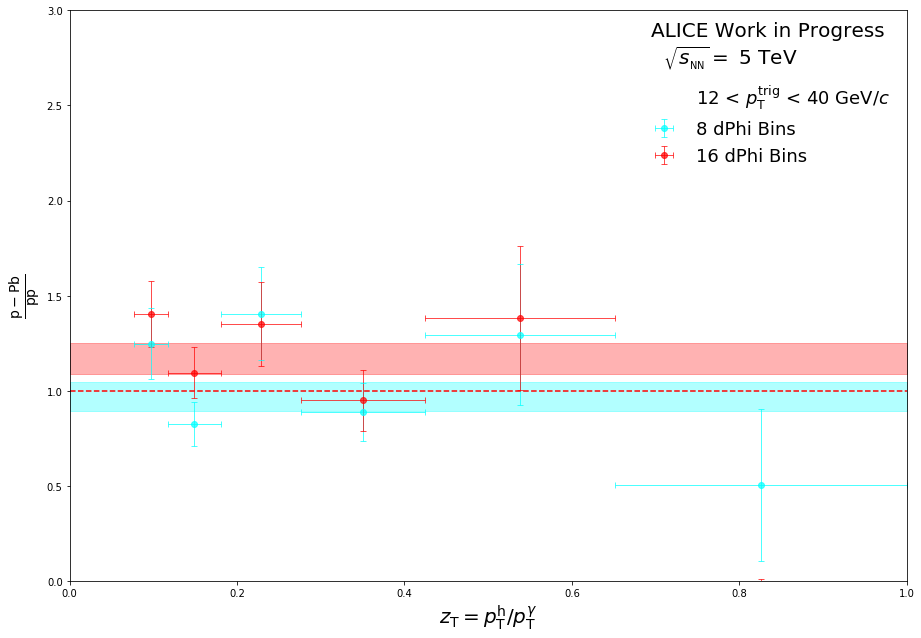

                Central Values:
[ 1.40359966  1.09574319  1.35002169  0.94964235  1.38229225 -0.24905534]

****************************************
Minimizer is Linear
Chi2                      =      9.42362
NDf                       =            5
p0                        =     0.969949   +/-   0.0744521   

****************************************
Minimizer is Linear
Chi2                      =      4.98682
NDf                       =            4
p0                        =      1.17005   +/-   0.0799277   


In [21]:
strings = ["dPhi_Rebin_16","05zT"]
string_descriptions = ["8 dPhi Bins", "16 dPhi Bins"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


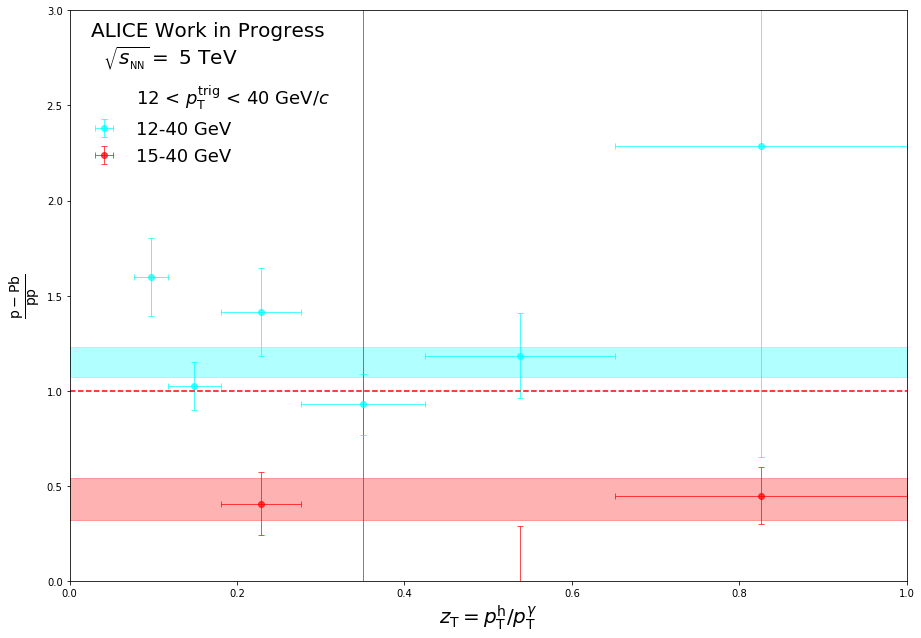

                Central Values:
[-1.61305282 -0.68465468  0.40750914 -0.76863004 -0.03656446  0.44928937]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =     0.034672
NDf                       =            1
p0                        =     0.430282   +/-   0.111733    


In [22]:
strings = ["pT_Rebin_4","pT_Rebin_4_Cut"]
string_descriptions = ["12-40 GeV", "15-40 GeV"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


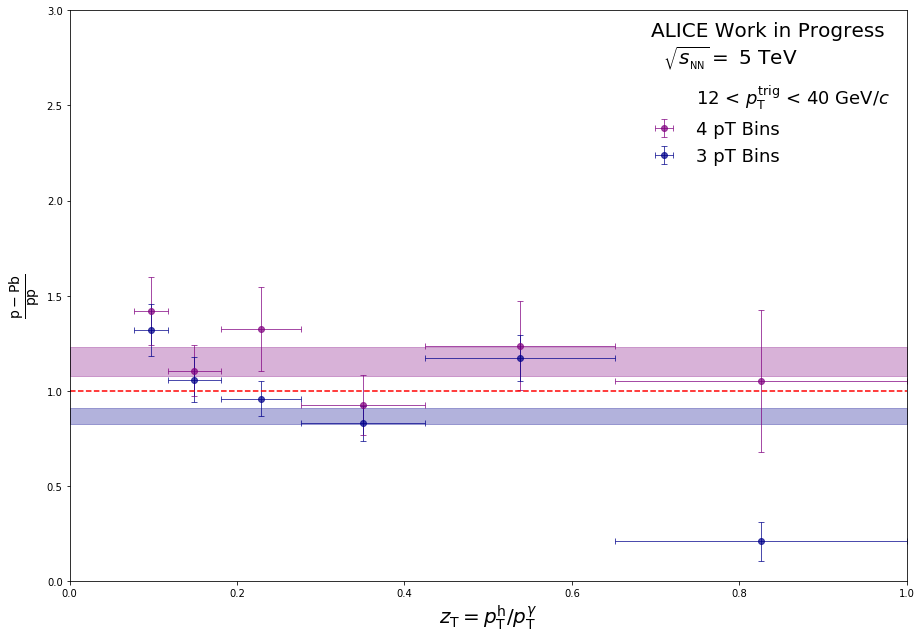

                Central Values:
[1.31934069 1.05935782 0.95893096 0.8298763  1.17231065 0.20835547]

****************************************
Minimizer is Linear
Chi2                      =      5.22693
NDf                       =            5
p0                        =      1.15623   +/-   0.0757757   

****************************************
Minimizer is Linear
Chi2                      =       64.091
NDf                       =            5
p0                        =       0.8671   +/-   0.0435484   


In [23]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights"]
string_descriptions = ["4 pT Bins", "3 pT Bins"]
colors = ["purple","darkblue"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


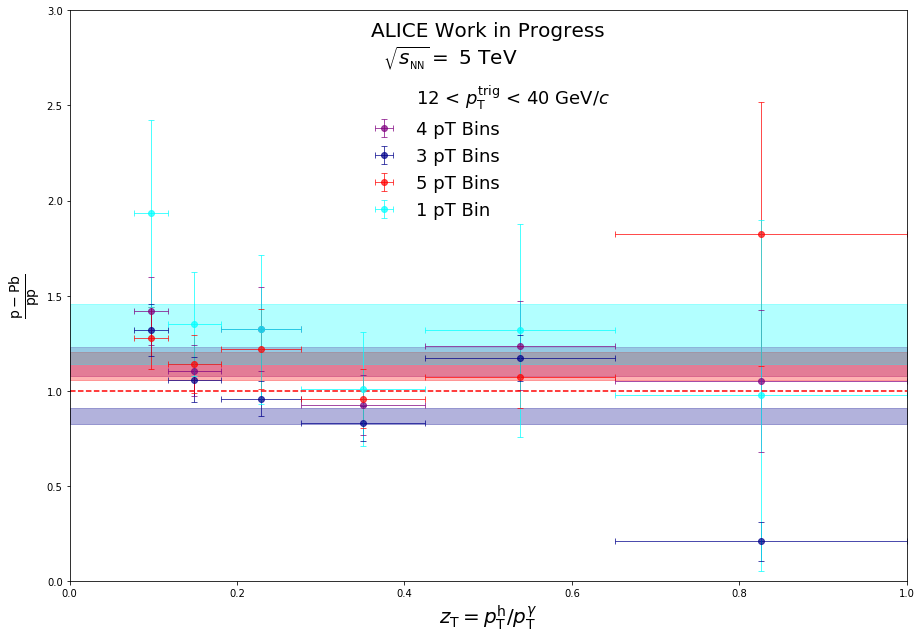

                Central Values:
[1.93415883 1.35304985 1.32425776 1.00967556 1.31898697 0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      5.22693
NDf                       =            5
p0                        =      1.15623   +/-   0.0757757   

****************************************
Minimizer is Linear
Chi2                      =       64.091
NDf                       =            5
p0                        =       0.8671   +/-   0.0435484   

****************************************
Minimizer is Linear
Chi2                      =       3.3319
NDf                       =            5
p0                        =      1.13134   +/-   0.0738275   

****************************************
Minimizer is Linear
Chi2                      =      2.75693
NDf                       =            5
p0                        =      1.29967   +/-   0.159201    


In [24]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_3_Weights","pT_Rebin_5_Weights","pT_Rebin_1"]
string_descriptions = ["4 pT Bins", "3 pT Bins","5 pT Bins","1 pT Bin"]
colors = ["purple","darkblue","red","cyan"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


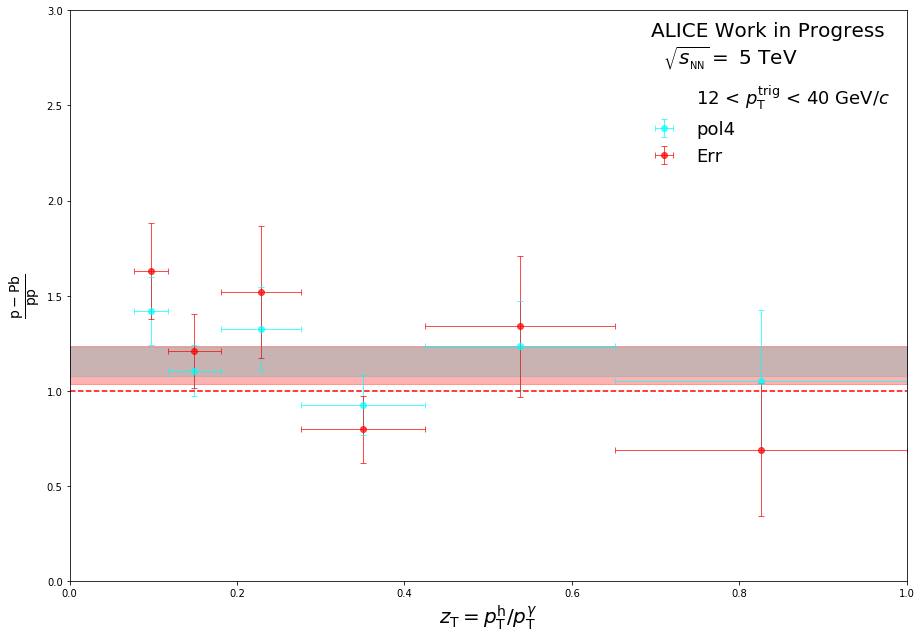

                Central Values:
[1.62998508 1.2101335  1.52003152 0.79741997 1.33920484 0.69125875]

****************************************
Minimizer is Linear
Chi2                      =      5.22693
NDf                       =            5
p0                        =      1.15623   +/-   0.0757757   

****************************************
Minimizer is Linear
Chi2                      =      10.8125
NDf                       =            5
p0                        =      1.13607   +/-   0.101323    


In [25]:
strings = ["pT_Rebin_4_Weights","pT_Rebin_4_ErrWeights"]
string_descriptions = ["pol4", "Err"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


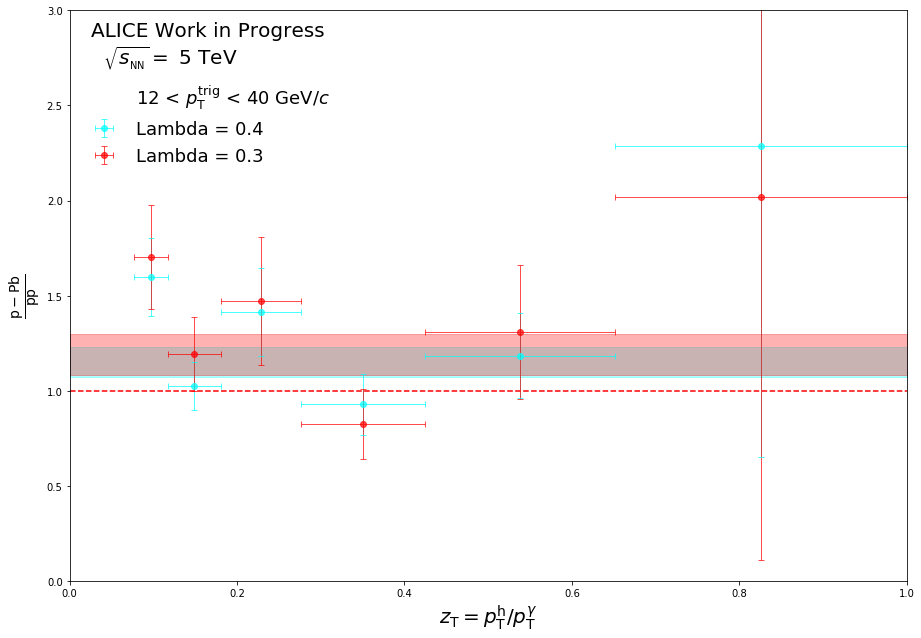

                Central Values:
[1.70222614 1.19527022 1.4729536  0.82636153 1.31005331 2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      8.39933
NDf                       =            5
p0                        =      1.19062   +/-   0.107626    


In [26]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


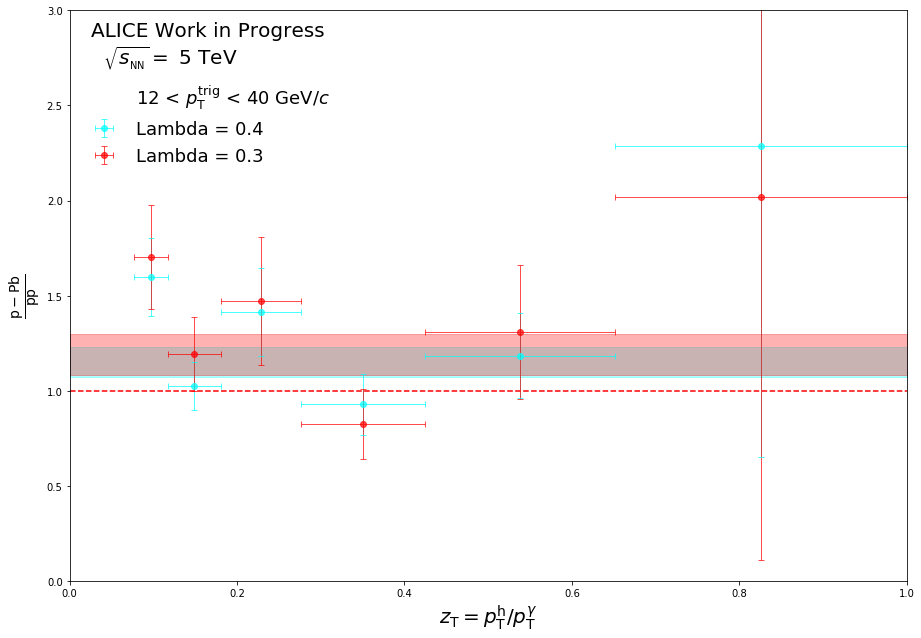

                Central Values:
[1.70222614 1.19527022 1.4729536  0.82636153 1.31005331 2.01777407]

****************************************
Minimizer is Linear
Chi2                      =      9.42772
NDf                       =            5
p0                        =      1.15188   +/-   0.077927    

****************************************
Minimizer is Linear
Chi2                      =      8.39933
NDf                       =            5
p0                        =      1.19062   +/-   0.107626    


In [27]:
strings = ["pT_Rebin_4","pT_Rebin_4_Lambda"]
string_descriptions = ["Lambda = 0.4", "Lambda = 0.3"]
colors = ["cyan","red"]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [28]:
import functions_fragmentation
reload(functions_fragmentation)
from functions_fragmentation import *

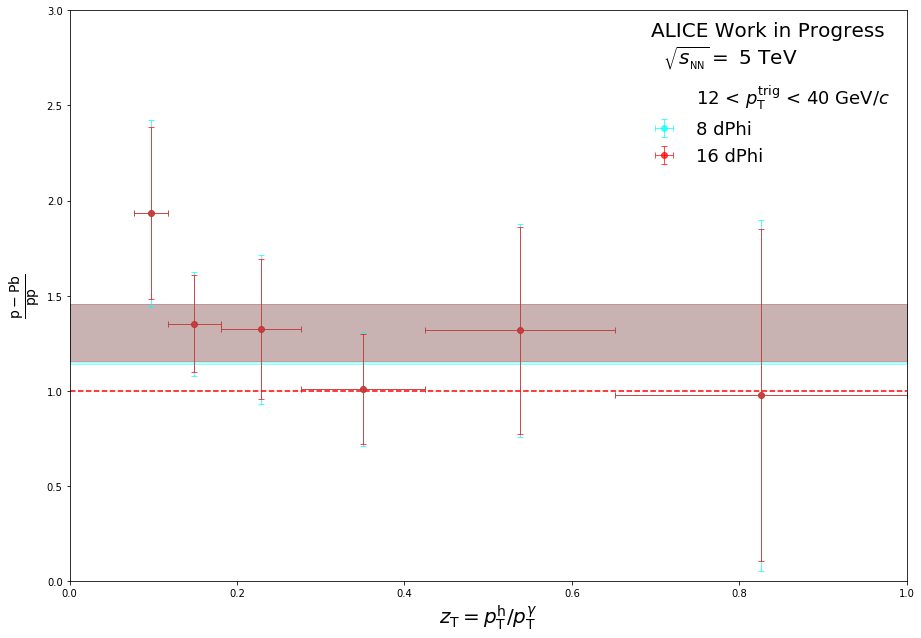

                Central Values:
[1.93415883 1.35304985 1.32425776 1.00967556 1.31898697 0.97595493]

****************************************
Minimizer is Linear
Chi2                      =      2.75693
NDf                       =            5
p0                        =      1.29967   +/-   0.159201    

****************************************
Minimizer is Linear
Chi2                      =      3.15467
NDf                       =            5
p0                        =      1.30624   +/-   0.150476    


In [29]:
strings = ["pT_Rebin_1","pT_Rebin_1_16dPhi"]
string_descriptions = ["8 dPhi", "16 dPhi"]
colors = ["cyan","red"]
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

[0.06335319 0.09719185 0.14910469 0.22874559 0.35092488 0.53836348
 0.82591817]


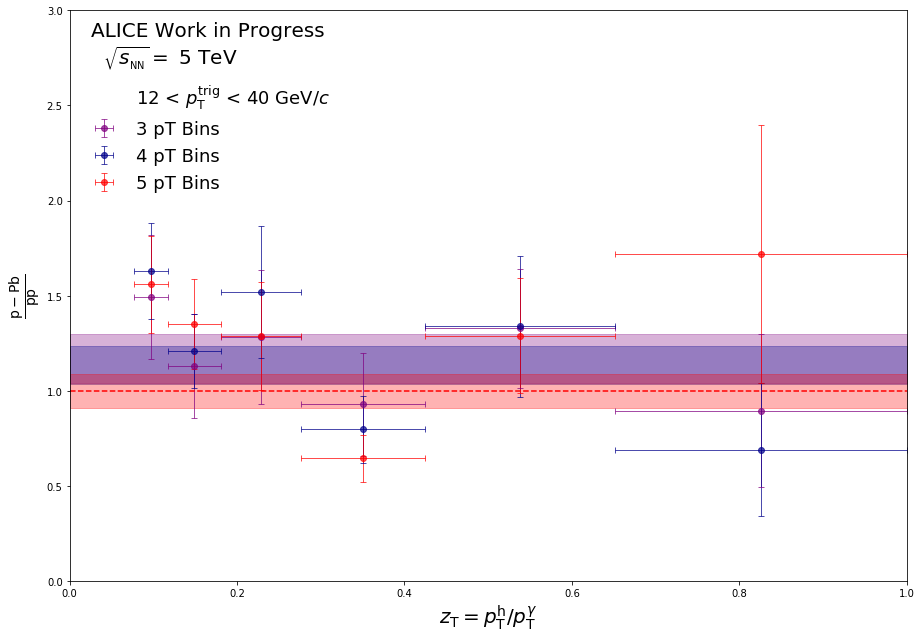

                Central Values:
[1.56044441 1.34968643 1.28675624 0.64593203 1.28956529 1.71962152]

****************************************
Minimizer is Linear
Chi2                      =      2.61333
NDf                       =            5
p0                        =      1.17129   +/-   0.12845     

****************************************
Minimizer is Linear
Chi2                      =      10.8125
NDf                       =            5
p0                        =      1.13607   +/-   0.101323    

****************************************
Minimizer is Linear
Chi2                      =      18.3916
NDf                       =            5
p0                        =     0.997835   +/-   0.089452    


In [30]:
strings = ["pT_Rebin_3_ErrWeights","pT_Rebin_4_ErrWeights","pT_Rebin_5_ErrWeights"]
string_descriptions = ["3 pT Bins", "4 pT Bins","5 pT Bins"]
colors = ["purple","darkblue","red",]
print(zT_centers)
Compare_pp_pPB_Avg_Ratio_lists(strings, string_descriptions,colors,True)

In [31]:
print(pTbins)

[12.0, 40.0]
